# Notebook 01 — Data Collection & Preparation
### Adaptive Statistical Arbitrage — Ayush Arora (MQMS2404)

In this notebook, we:
- Build the NIFTY 100 universe  
- Download 10 years of historical daily prices  
- Clean missing values  
- Validate the data visually  
- Save the cleaned dataset for future analysis  


In [1]:
import yfinance as yf            # Download historical stock data
import pandas as pd              # Data manipulation
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Visualization

plt.style.use("seaborn-v0_8")    # Clean visual style

## Step 2: Define the NIFTY 100 Stock Universe
We use NIFTY 100 because it is liquid, diverse, and ideal for discovering cointegrated pairs.

In [2]:
tickers = [
    "RELIANCE.NS","TCS.NS","HDFCBANK.NS","ICICIBANK.NS","INFY.NS","KOTAKBANK.NS",
    "AXISBANK.NS","SBIN.NS","ITC.NS","HINDUNILVR.NS","BHARTIARTL.NS","LT.NS",
    "MARUTI.NS","M&M.NS","HEROMOTOCO.NS","BAJAJ-AUTO.NS","ULTRACEMCO.NS",
    "TATASTEEL.NS","JSWSTEEL.NS","ASIANPAINT.NS","BAJFINANCE.NS","BAJAJFINSV.NS",
    "POWERGRID.NS","NTPC.NS","COALINDIA.NS","GRASIM.NS","TITAN.NS","SUNPHARMA.NS",
    "DRREDDY.NS","DIVISLAB.NS","NESTLEIND.NS","BRITANNIA.NS","WIPRO.NS","HCLTECH.NS",
    "TECHM.NS","HAVELLS.NS","PIDILITIND.NS","GODREJCP.NS","DABUR.NS",
    "ICICIPRULI.NS","ICICIGI.NS","HDFCLIFE.NS","BAJAJHLDNG.NS","MUTHOOTFIN.NS",
    "ADANIPORTS.NS","ADANIENT.NS","ADANIGREEN.NS","ADANITRANS.NS","ONGC.NS",
    "OIL.NS","BPCL.NS","IOC.NS","BHARATFORG.NS","EICHERMOT.NS","SHREECEM.NS",
    "AMBUJACEM.NS","PIDILITIND.NS","TATAMOTORS.NS","TATAPOWER.NS","TATACONSUM.NS",
    "CHOLAFIN.NS","PEL.NS","LUPIN.NS","CIPLA.NS","APOLLOHOSP.NS","TORNTPHARM.NS",
    "AUROPHARMA.NS","BERGEPAINT.NS","COLPAL.NS","UBL.NS","HDFCAMC.NS",
    "LICI.NS","GAIL.NS","ZOMATO.NS","PAYTM.NS","HINDALCO.NS","VEDL.NS",
    "INDUSINDBK.NS","YESBANK.NS","CANBK.NS","BANKBARODA.NS","IDFCFIRSTB.NS",
    "JINDALSTEL.NS","SRF.NS","ABB.NS","SIEMENS.NS","TATACHEM.NS","IRCTC.NS",
    "TVSMOTOR.NS","ASHOKLEY.NS","BOSCHLTD.NS","BHEL.NS"
]

len(tickers)

92

## Step 3: Download Historical Daily Closing Prices

In [3]:
data = yf.download(
    tickers,
    start="2015-01-01",
    end="2025-01-01"
)["Close"]

data.head()

C:\Users\arora\AppData\Local\Temp\ipykernel_27080\2509248328.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[****************      34%                       ]  31 of 91 completedHTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: PEL.NS"}}}
[*********************100%***********************]  91 of 91 completed

7 Failed downloads:
['PEL.NS', 'ADANITRANS.NS', 'ZOMATO.NS']: YFTzMissingError('possibly delisted; no timezone found')
['MARUTI.NS']: Timeout('Failed to perform, curl: (28) Operation timed out after 10003 milliseconds with 27463 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['BRITANNIA.NS']: Timeout('Failed to perform, curl: (28) Operation timed out after 10001 milliseconds with 43155 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['HINDALCO.NS']: Timeout('Failed to 

Ticker,ABB.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANITRANS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASHOKLEY.NS,ASIANPAINT.NS,AUROPHARMA.NS,...,TECHM.NS,TITAN.NS,TORNTPHARM.NS,TVSMOTOR.NS,UBL.NS,ULTRACEMCO.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZOMATO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1131.143555,70.761375,NaN,301.772858,NaN,195.772980,1084.179321,21.544607,684.931519,532.220825,...,462.629150,362.723755,494.190887,259.655640,808.554260,2548.028809,70.610985,93.508194,147.012482,NaN
2015-01-02,1119.410767,71.107956,NaN,301.584015,NaN,198.523727,1086.056885,22.124655,708.611328,534.770935,...,464.893738,365.588867,514.467651,250.206848,809.523132,2624.206055,71.593269,94.337662,150.751801,NaN
2015-01-05,1119.671387,72.284897,NaN,305.786469,NaN,198.265823,1089.667847,23.947659,708.565735,534.510925,...,457.137268,368.549530,512.181091,253.434357,806.907471,2629.565430,70.788139,94.506920,151.075287,NaN
2015-01-06,1109.503052,71.736137,NaN,303.944946,NaN,190.959259,1057.216553,23.429758,691.651428,513.663147,...,452.233887,355.943054,488.625641,250.768082,806.471497,2555.780518,67.326035,92.297859,146.841217,NaN
2015-01-07,1093.511230,71.100731,NaN,303.236694,NaN,189.197098,1065.498169,24.714149,705.548584,521.808899,...,450.120880,357.757538,486.015411,260.357269,869.103882,2545.683838,67.309937,91.595390,144.120010,NaN


## Step 4: Data Cleaning

In [11]:
valid_cols = data.columns[data.isnull().mean() < 0.20]
data = data[valid_cols]

print("Stocks kept after cleaning:", len(valid_cols))

Stocks kept after cleaning: 77


In [5]:
data = data.ffill().bfill()  # Fill missing values forward & backward

## Step 5: Visualize a Few Stocks

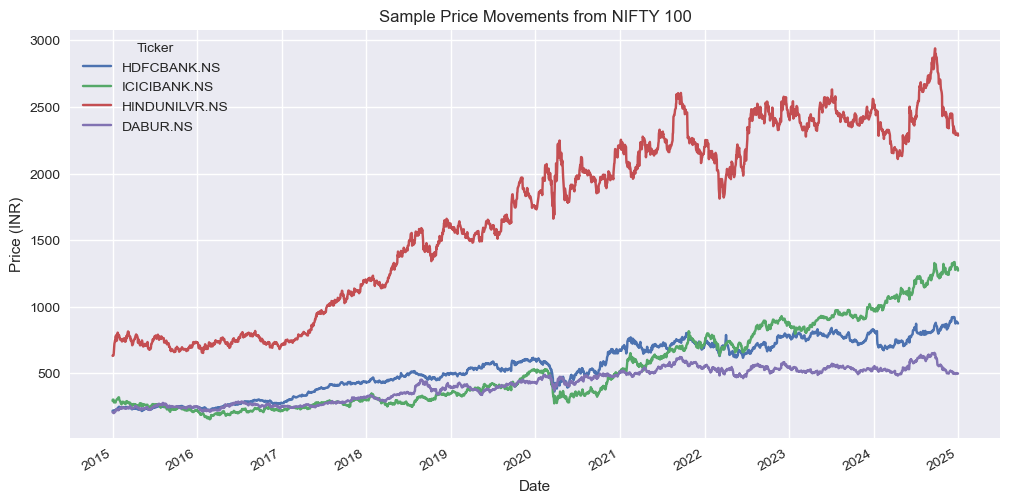

In [7]:
sample = ["HDFCBANK.NS", "ICICIBANK.NS", "HINDUNILVR.NS", "DABUR.NS"]
data[sample].plot(figsize=(12,6), title="Sample Price Movements from NIFTY 100")
plt.ylabel("Price (INR)")
plt.show()

## Step 6: Save Cleaned Dataset

In [8]:
data.to_csv("data/prices.csv")
print("Data successfully saved to: data/prices.csv")

Data successfully saved to: data/prices.csv
